In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data=pd.merge(study_results, mouse_metadata, on=["Mouse ID"], how="outer")
#suffixes=("Mouse ID", "Timepoint"))
data.sort_values(by="Timepoint", ascending=True)
data

#newdata=pd.DataFrame["Mouse ID": [data]]
#newdata
# Display the data table for preview

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Getting the duplicate mice by ID number that shows up for Mouse ID 
#and Timepoint. 
#datadupe = pd.Series("Mouse ID":['lama', 'cow', 'lama', 'beetle', 'lama'])
#animals.duplicated()
#data-df.duplicates
#duplicates = data[data.duplicated(['Mouse ID','Timepoint'],False)]
#duplicates["Mouse ID"].unique()
#duplicates
#TimeGroup=data.groupby("Mouse ID")
#df=data.loc[data==TimeGroup]
#df=pd.DataFrame({'Mouse ID':[]})

In [3]:
# Checking the number of mice in the DataFrame.
Micecount= len(data["Mouse ID"].unique())
Micecount

249

In [4]:
#number of drugs
Drugcount= len(data["Drug Regimen"].unique())
Drugcount

10

In [5]:
#micenumber=data.loc[:, ["Mouse ID", "Timepoint"]]
duplicates=data[data.duplicated(["Mouse ID", "Timepoint"], False)]
duplicates["Mouse ID"].unique()

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
#duplicates
data[data["Mouse ID"]=="g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_df=data[-data["Mouse ID"].str.contains]
clean_df=data[data["Mouse ID"]!="g989"]
#clean_df["Mouse ID"].count()
#clean_df.sort_values(by="Timepoint", ascending=False)
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [8]:
# Checking the number of mice in the clean DataFrame.
Micecount= len(clean_df["Mouse ID"].unique())
Micecount

248

In [9]:
#orgdata=data.sort_values(by=["Mouse ID", "Timepoint"])
#orgdata
# Dependencies and Setup
#clean_data=data.dropna(how="any")
#clean_data
#data_df=clean_data.loc[clean_data["Timepoint"]=="0"]
#data_df=clean_data.groupby(["Mouse ID"])
#print(data_df)
# Study data files

In [10]:
# Generate a summary statistics table of mean, median, variance, 
#standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary2=clean_df.groupby(["Drug Regimen"])

meanvolume=summary2["Tumor Volume (mm3)"].mean() 
medianvolume=summary2["Tumor Volume (mm3)"].median()
varvolume=summary2["Tumor Volume (mm3)"].var()
stdvolume=summary2["Tumor Volume (mm3)"].std()
semvolume=summary2["Tumor Volume (mm3)"].sem()
summary_df=pd.DataFrame({"Mean Tumor Volume": meanvolume,
                        "Median Tumor Volume":medianvolume,
                        "Tumor Volume Variance":varvolume,
                        "Tumore Volume Std. Dev.":stdvolume,
                        "Tumor Volume Std. Err.":semvolume})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumore Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


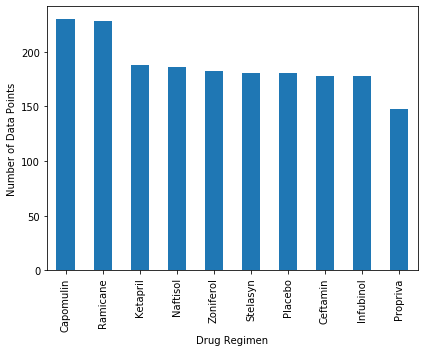

In [11]:
# Generate a bar plot showing the number of mice per time point 
#for each treatment throughout the course of the study using pyplot.
x_axis1=clean_df["Drug Regimen"].value_counts()

x_axis1.plot(kind="bar", figsize=(6,5))
#plt.title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.tight_layout()
plt.show()

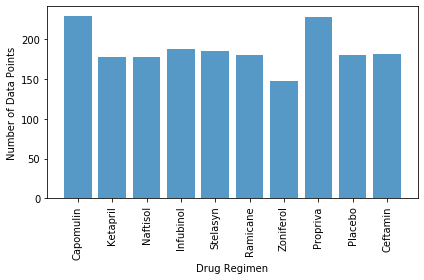

In [12]:
# Generate a bar plot showing the number of mice per time point for
#each treatment throughout the course of the study using pandas. 
#regimen_graph=pd.DataFrame(finished_data.groupby(["Drug Regimen"])
#pandasregimen=regimen_graph[["Drug Regimen", "Mouse ID"]]
#pandasregimen=pandasregimen.rename(columns={"Mouse ID": "Total"})
#pandasregimen=pandasregimen.index("Drug Regimen")
#pandasregimen.plot(kind="bar", figsiz=(15,3))
#x-axis=(0, 200, 50)
#bardata=summary_df.
#summary_df.bar(x_axis, drugregimen, facecolor="blue", alpha=.75, align="center")
y_axis=clean_df.groupby("Drug Regimen")["Mouse ID"].count()
x_axis=clean_df["Drug Regimen"].unique()
plt.bar(x_axis,y_axis, alpha=0.75, align="center")
plt.xticks(x_axis, rotation=90)

#create column for number of mice per time point
#plt.title("Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.tight_layout()
plt.show()

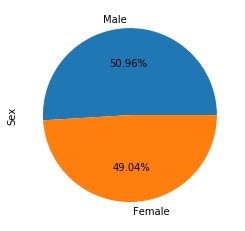

In [13]:
# Generate a pie plot showing the distribution of female versus
#male mice using pandas
sex=clean_df["Sex"].value_counts()
sex.plot(kind="pie", autopct='%.2f%%')
#plt.savefig("Piechart1")
plt.show()

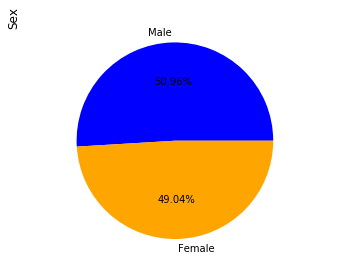

In [14]:
# Generate a pie plot showing the distribution of 
#female versus male mice using pyplot
#define variables
#labels=clean_df["Sex"].unique()
#labels=sex
sexcount=clean_df["Sex"].value_counts()
labels=sexcount.index.tolist() 
colors=["blue", "orange"]
explode=(0,0)
plt.pie(sexcount, explode=explode, labels=labels, colors=colors,
       autopct="%.2f%%", shadow=False) #startangle=180)
plt.axis("equal", align="center")
plt.title("Sex", loc="left", rotation=90) #align="center")
#plt.xticks(rotation=90)
#plt.hist("Sex")
plt.show()

In [15]:
# Calculate the final tumor volume of each mouse across four of the most 
#promising treatment regimens. Calculate the IQR and quantitatively 
#determine if there are any potential outliers. 
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume
#at the last timepoint
#Create subset of Drugs to slice original data
#tumor_df=clean_df
#tumor_df=clean_df.groupby[(clean_df["Drug Regimen"]=="Capomulin",
                     #(clean_df["Drug Regimen"] == "Ramicane"),
                     #(clean_df["Drug Regimen"] == "Infubinol"),
                     #(clean_df["Drug Regimen"] == "Ceftamin")),:]
#tumor_df=tumor_df.sort_values("Timepoint", ascending= False)
#groupby? timepoint=45 for max tumor size

subset1=clean_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
tumor_df=subset1.loc[subset1["Timepoint"] == 45]                     

tumor_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
1710,b742,45,38.939633,0,Capomulin,Male,7,21
1834,g288,45,37.074024,1,Capomulin,Male,3,19
1824,g316,45,40.159220,2,Capomulin,Female,22,22
1867,i557,45,47.685963,1,Capomulin,Female,1,24


In [16]:
#Clarify data with groupby
#drugdata=drugs.groupby(["Drug Regimen", "Mouse ID", "Timepoint"])
#get the final results of the drug???
#drugdata.head()
#Capolumin
#drugs=clean_df[clean_df["Drug Regimen"].isin(df)].... doesnt work, other...
#Use repeat isin to find drug regimen associated, then loc timepoint?? 
#drugs=clean_df[clean_df["Drug Regimen"].groupby("Timepoint")]

capomulindata = tumor_df[tumor_df['Drug Regimen'].isin(['Capomulin'])]
capomulindata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
1710,b742,45,38.939633,0,Capomulin,Male,7,21
1834,g288,45,37.074024,1,Capomulin,Male,3,19
1824,g316,45,40.159220,2,Capomulin,Female,22,22
1867,i557,45,47.685963,1,Capomulin,Female,1,24


In [17]:
#Create a new column for each drug and seperate the tumor size for timepoint45

capomulin=capomulindata.sort_values(["Tumor Volume (mm3)"])

capomulin=capomulin["Tumor Volume (mm3)"]

capomulin


1700    23.343598
1892    28.430964
1720    28.484033
1754    31.023923
1814    31.896238
1690    32.377357
1877    33.329098
1857    34.455298
1784    36.041047
1834    37.074024
1794    37.311846
1764    38.125164
1844    38.846876
1710    38.939633
9       38.982878
1824    40.159220
1774    40.658124
1740    40.728578
1730    41.483008
1804    41.581521
1867    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [18]:
#capofinal.max()

In [19]:
            #Capomulin quartiles
# Quantitatively determine ramicane outliers
quartiles = capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = (lowerq - (1.5*iqr))
upper_bound = (upperq + (1.5*iqr))
minimum=capomulin.min()
maximum=capomulin.max()
#If(capofinal.max()>upper_bound), ""?????????

print(f"The Lower quartile is: {lowerq}")
print(f"The Upper quartile is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"Capomulin potential outliers: x<{lower_bound},x>{upper_bound}")
print(f"With min {minimum} and max {maximum}, No Outliers")

The Lower quartile is: 32.37735684
The Upper quartile is: 40.1592203
The interquartile range of occupancy is: 7.781863460000004
Capomulin potential outliers: x<20.70456164999999,x>51.83201549
With min 23.34359787 and max 47.68596303, No Outliers


In [20]:
            #Ramicane
#Use repeat isin then groupby to find drug regimen associated
ramicanedata = tumor_df[tumor_df['Drug Regimen'].isin(['Ramicane'])]

ramicane=ramicanedata.sort_values(["Tumor Volume (mm3)"])

ramicane=ramicane["Tumor Volume (mm3)"]

ramicane

514     22.050126
574     29.128472
626     30.276232
604     30.564625
646     30.638696
616     31.095335
460     31.560470
554     32.978522
524     33.397653
564     33.562402
500     36.134852
1669    36.374510
544     37.225650
490     37.311236
470     38.407618
584     38.810366
636     40.659006
594     40.667713
480     43.047543
890     45.220869
Name: Tumor Volume (mm3), dtype: float64

In [21]:
            #Ramicane quartiles
# Quantitatively determine ramicane outliers
quartiles2 = ramicane.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2
lower_bound2 = (lowerq2 - (1.5*iqr2))
upper_bound2 = (upperq2 + (1.5*iqr2))
minimum2=ramicane.min()
maximum2=ramicane.max()
print(f"The Lower quartile is: {lowerq2}")
print(f"The Upper quartile is: {upperq2}")
print(f"The interquartile range of occupancy is: {iqr2}")
print(f"Capomulin potential outliers: x<{lower_bound2}, x>{upper_bound2}")
print(f"With min {minimum2} and max {maximum2}, No Outliers")

The Lower quartile is: 30.981175224999998
The Upper quartile is: 38.508305307499995
The interquartile range of occupancy is: 7.527130082499998
Capomulin potential outliers: x<19.690480101250003, x>49.79900043124999
With min 22.05012627 and max 45.22086888, No Outliers


In [22]:
        #Infubinol
infubinoldata = tumor_df[tumor_df['Drug Regimen'].isin(['Infubinol'])]

infubinol=infubinoldata.sort_values(["Tumor Volume (mm3)"])

infubinol=infubinol["Tumor Volume (mm3)"]

infubinol

1659    60.918767
1459    62.435404
279     62.754451
289     65.525743
1423    66.083066
253     66.196912
243     67.685569
907     67.973419
224     72.226731
Name: Tumor Volume (mm3), dtype: float64

In [23]:
            #Infubinol quartiles
# Quantitatively determine ramicane outliers
quartiles3 = infubinol.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3
lower_bound3 = (lowerq3 - (1.5*iqr))
upper_bound3 = (upperq3 + (1.5*iqr))
minimum3=infubinol.min()
maximum3=infubinol.max()
print(f"The Lower quartile is: {lowerq3}")
print(f"The Upper quartile is: {upperq3}")
print(f"The interquartile range of occupancy is: {iqr3}")
print(f"Capomulin potential outliers: x<{lower_bound3}, x>{upper_bound3}")
print(f"With min {minimum3} and max {maximum3}, No Outliers")

The Lower quartile is: 62.75445141
The Upper quartile is: 67.68556862
The interquartile range of occupancy is: 4.9311172099999965
Capomulin potential outliers: x<51.08165622, x>79.35836381
With min 60.91876652 and max 72.2267309, No Outliers


In [24]:
        #ceftamin
ceftamindata = tumor_df[tumor_df['Drug Regimen'].isin(['Ceftamin'])]

ceftamin=ceftamindata.sort_values(["Tumor Volume (mm3)"])

ceftamin=ceftamin["Tumor Volume (mm3)"]

ceftamin

1639    59.741901
1384    59.851956
1313    61.386660
1623    61.433892
1394    61.849023
1487    62.999356
1326    64.299830
1497    64.634949
1364    64.729837
1411    67.527482
1354    67.748662
1374    68.594745
1477    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [25]:
            #ceftamin quartiles
# Quantitatively determine ramicane outliers
quartiles4 = ceftamin.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4
lower_bound4 = (lowerq4 - (1.5*iqr4))
upper_bound4 = (upperq4 + (1.5*iqr4))
minimum4=ceftamin.min()
maximum4=ceftamin.max()
print(f"The Lower quartile is: {lowerq4}")
print(f"The Upper quartile is: {upperq4}")
print(f"The interquartile range of occupancy is: {iqr4}")
print(f"Capomulin potential outliers: x<{lower_bound4}, x>{upper_bound4}")
print(f"With min {minimum4} and max {maximum4}, No Outliers")

The Lower quartile is: 61.43389223
The Upper quartile is: 67.52748237
The interquartile range of occupancy is: 6.093590140000003
Capomulin potential outliers: x<52.29350701999999, x>76.66786758
With min 59.74190064 and max 68.92318457, No Outliers


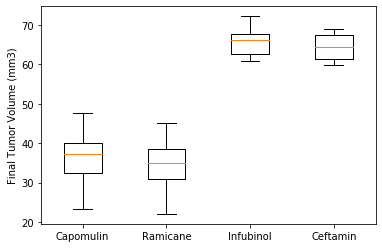

In [26]:
# Generate a box plot of the final tumor volume of each mouse 
#across four regimens of interest
#boxplot=tumor_df(["capomulin"], ["ramicane"], ["infubinol"], ["ceftamin"]
drugs=[capomulin, ramicane, infubinol, ceftamin]
fig1, ax1=plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)") #rotate=90)
ax1.boxplot(drugs, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
#plt.savefig("Boxplot1")
plt.show()

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with 
#Capomulin loc mouse I509
#lineplot=capomulin.loc[capomulin["I509"]]
#capo_df=capomulindata.loc[capomulindata["Mouse ID"] == "I509"]
#capomulin_df=tumors.loc["Drug Regimen"]

capo1_df=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
capo1_df=capo1_df.reset_index()
capo1_df

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.000000,0,Capomulin,Female,9,22
1,1,b128,5,45.651331,0,Capomulin,Female,9,22
2,2,b128,10,43.270852,0,Capomulin,Female,9,22
3,3,b128,15,43.784893,0,Capomulin,Female,9,22
4,4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...,...
225,1888,m601,25,33.118756,1,Capomulin,Male,22,17
226,1889,m601,30,31.758275,1,Capomulin,Male,22,17
227,1890,m601,35,30.834357,1,Capomulin,Male,22,17
228,1891,m601,40,31.378045,1,Capomulin,Male,22,17


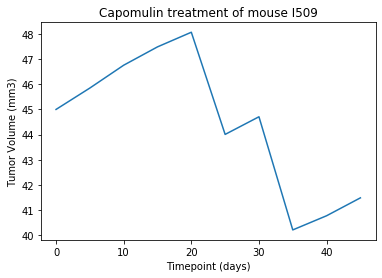

In [28]:
#loc mouse I509
cap_tumor_df=capo1_df.loc[capo1_df["Mouse ID"]== "l509"]

#Define Variables and axis
x_axis_capo=cap_tumor_df["Timepoint"]
y_axis_capo=cap_tumor_df["Tumor Volume (mm3)"]
plt.title("Capomulin treatment of mouse I509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

#Plot using plt.plot(x,y,line,marker, color)
plt.plot(x_axis_capo, y_axis_capo)

plt.show()

In [29]:
# Generate a scatter plot of mouse weight versus average tumor volume for the 
#Capomulin regimen
#loc the weight, mm3, Mouse ID... (capomulin:drug regimen),---
#take mean
#capo2_df=capo1_df.loc[""]
#average1=capo1_df["Tumor Volume(mm3)"].mean()
average1=capo1_df.groupby(["Mouse ID"]).mean()
#average1

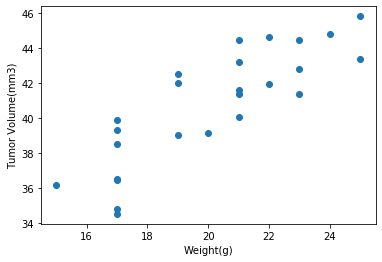

In [30]:
plt.scatter(average1["Weight (g)"], average1["Tumor Volume (mm3)"])
#x_values=subset["Capomulin"]
#y_values=subset["Tumor Volume(mm3)"].mean()
plt.xlabel("Weight(g)")
plt.ylabel("Tumor Volume(mm3)")
plt.show()

In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#plt.scatter(who_data.iloc[:,1],who_data.iloc[:,8])
#plt.xlabel('Income Per Capita')
#plt.ylabel('Average Alcohol Consumed Per Person Per Year (L)')
#plt.show()
weight_corr=average1.iloc[:,0]
tumor_corr=average1.iloc[:,1]
#correlation= st.pearsonr(weight_corr, tumor_corr)[0],2

print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(weight_corr,tumor_corr)[0],2)}")


The correlation between mouse weight and the average tumor volume is -0.11


In [32]:
#identify regress
regress=st.linregress(average1["Weight (g)"], average1["Tumor Volume (mm3)"])
regress

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

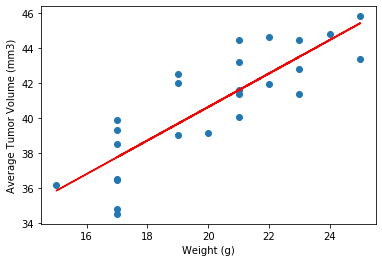

In [33]:
slope1=0.9544396890241045
intercept1=21.552160532685015
# for mouse weight and average tumor volume for the Capomulin regimen
#x_axis_corr=average1["Weight (g)"]
#y_axis_corr=average1["Tumor Volume (mm3)"]
#lineregress(x_axis_corr, y_axis_corr)
#assign slope and intercepts to identify r
y_axis_corr = average1['Weight (g)']*slope1+intercept1
#create secondary scatter plot
plt.scatter(average1['Weight (g)'],average1['Tumor Volume (mm3)'])
#plotline
plt.plot(average1['Weight (g)'],y_axis_corr,color="red") #marker=o
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()